# Advertising Sales Channel Prediction

## Description

### Importing Required Libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [59]:
df=pd.read_csv('Advertising.csv')

In [60]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [61]:
#checking the data dimension
df.shape

(200, 5)

In [62]:
df.columns # the Sales is the target variable that we have to predict.

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [63]:
df.drop('Unnamed: 0',axis=1, inplace=True)

Here Unnamed: 0 does not effect on target column so removed it.

In [64]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [65]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [66]:
#checking null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

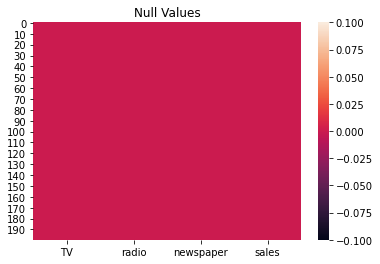

In [67]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Observation: There is 0 NaN value

In [68]:
#checking Datatypes
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

All columns are float type

In [69]:
#statistical summary
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Here we observe that TV have maximum sales than rest. 

## Uni-Variate Analysis

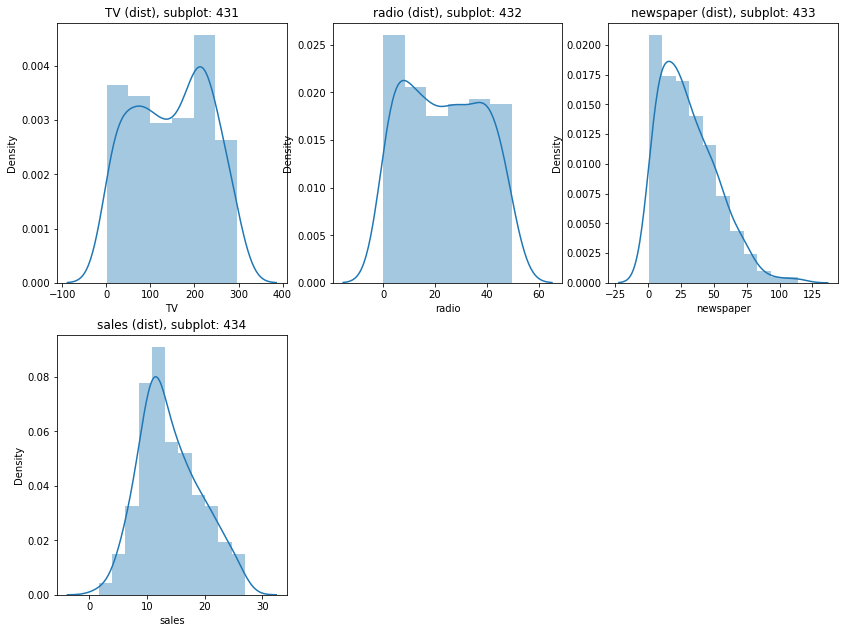

In [70]:
#Numerical Data
Columns= df.columns

#  plot Numerical Data
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in Columns:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1

plt.show()

Only Newspaper is right skewed.

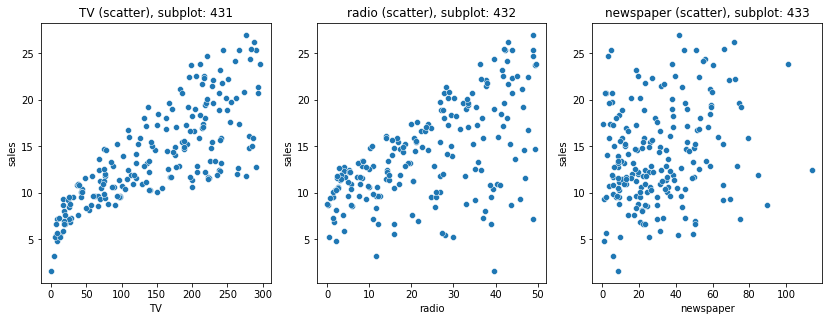

In [71]:
Columns = ['TV', 'radio', 'newspaper']

#  plot Numerical Data
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in Columns:

    
    plt.subplot(a, b, c)
    plt.title('{} (scatter), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(data = df, x = i, y = 'sales')
    c = c + 1

plt.show()

### Multi Variate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

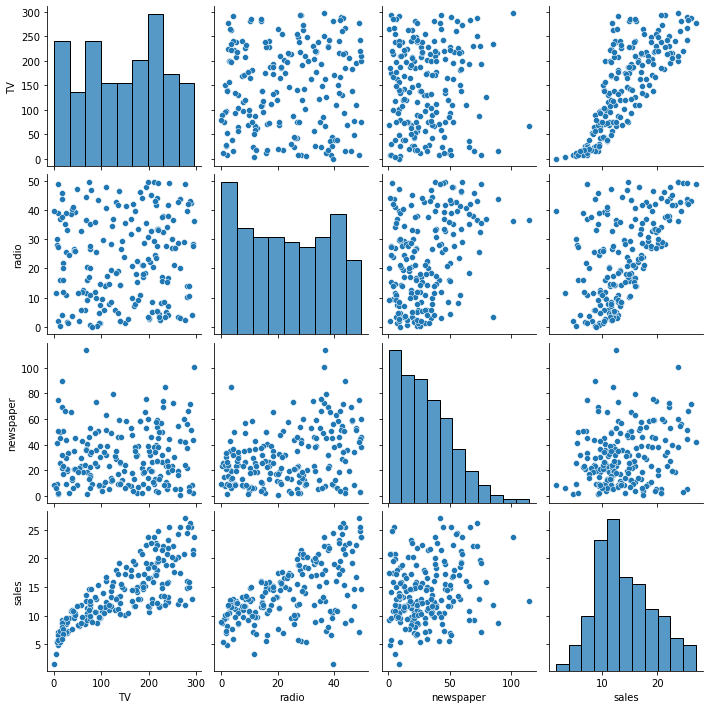

In [72]:
#Checking normal distribution of each column
sns.pairplot(df) 
plt.show

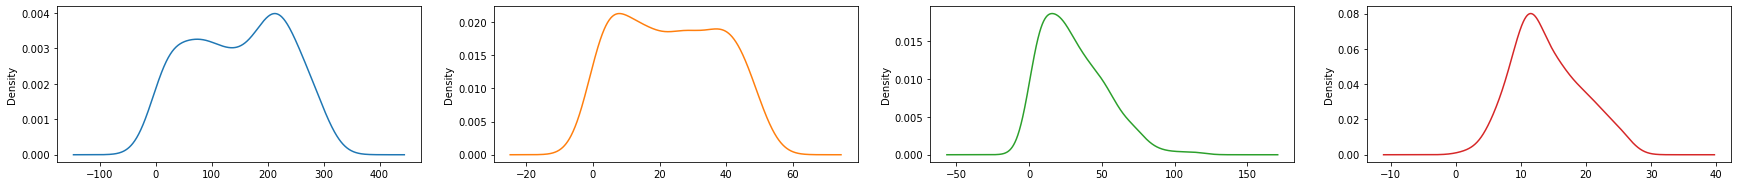

In [73]:
#Checking normal distribution of each column
df.plot(kind='density',subplots=True, layout=(6,4), sharex=False, legend=False, figsize=[30,20])
plt.show()

### Checking correlation

In [74]:
#Correlation
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


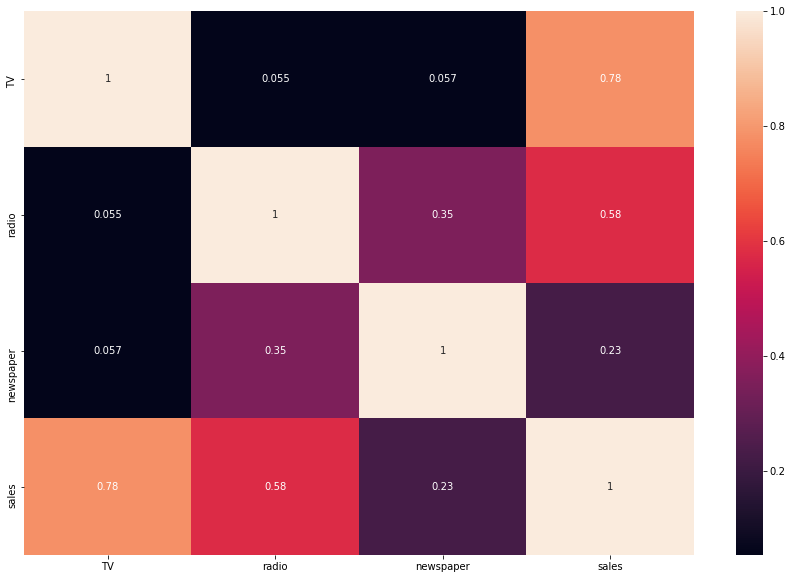

In [75]:
#Heatmap for correlation
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

### Checking Outliers Using Boxplot

<AxesSubplot:>

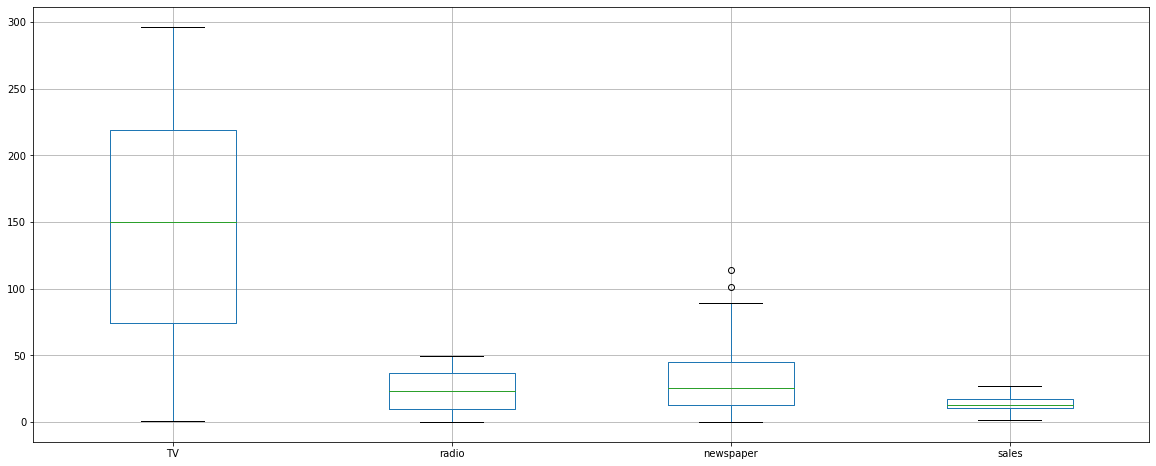

In [76]:
df.boxplot(figsize=[20,8])

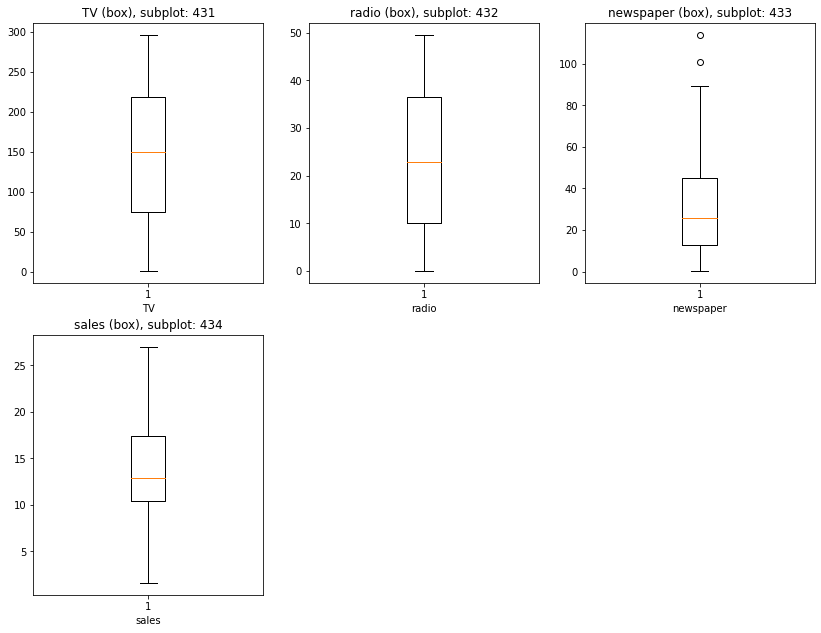

In [77]:
Columns = df.columns

#  plot Numerical Data
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in Columns:
    

    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1

plt.show()

### Splitting the independent and target variables in x and y

In [78]:
x=df.drop("sales",axis=1)
y=df["sales"]

In [79]:
print(x.shape)
print(y.shape)

(200, 3)
(200,)


In [80]:
x.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

In [81]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
x_new=pt.fit_transform(x)

In [85]:
x=x_new
x

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

In [86]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x=scale.fit_transform(x)
x

array([[0.8271509 , 0.83391432, 0.79088044],
       [0.23493581, 0.85600341, 0.64118352],
       [0.1086211 , 0.94968935, 0.79142888],
       [0.60364273, 0.88497336, 0.72914393],
       [0.68990034, 0.34897604, 0.7285357 ],
       [0.05989711, 0.99059239, 0.82192355],
       [0.28719024, 0.75780482, 0.45671577],
       [0.50642617, 0.53238076, 0.30502322],
       [0.05926817, 0.09818667, 0.03958012],
       [0.74384478, 0.11708761, 0.4317371 ],
       [0.3200438 , 0.22019838, 0.46402742],
       [0.78520006, 0.6123993 , 0.14876023],
       [0.14220052, 0.79331389, 0.7725032 ],
       [0.43168118, 0.26975835, 0.22555908],
       [0.75586096, 0.7593675 , 0.64755399],
       [0.73147799, 0.974347  , 0.69405383],
       [0.32640158, 0.8160074 , 1.        ],
       [0.96187939, 0.86038331, 0.71249356],
       [0.33160603, 0.54924163, 0.39783706],
       [0.59093087, 0.61064363, 0.40748749],
       [0.79535   , 0.67559097, 0.69727623],
       [0.84677491, 0.19959636, 0.45671577],
       [0.

### Finding Best Random State

Here we find the random state which we will use to build the model.

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [89]:
maxScore=0
maxRs=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    predlm=lm.predict(x_test)
    sc=lm.score(x_train,y_train)
    if sc>maxScore:
        maxScore=sc
        maxRs=i
print("Best Accuracy is ", maxScore,"on Random_State",maxRs)

Best Accuracy is  0.9228846311393284 on Random_State 10


We have found best random_state value as 10. We will create our train_test_split using random_state(10)

### Creating Model

We will apply multiple Regression models for checking the r2_score,mean_squared_error, mean_absolute_error.

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

In [92]:
models=[LinearRegression(),
        Lasso(), Ridge(),
        ElasticNet(),
        SVR(),
        DecisionTreeRegressor(),
        KNeighborsRegressor(),
        RandomForestRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor(),
      ]
model_names=['LinearRegression',
        'Lasso', 'Ridge',
        'ElasticNet',
        'SVR',
        'DecisionTreeRegressor',
        'KNeighborsRegressor',
        'RandomForestRegressor',
        'AdaBoostRegressor',
        'GradientBoostingRegressor']
r2=[]
mae=[]
mse=[]
rmse=[]
d={}

for model in range(len(models)):
    mod=models[model]
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    r2.append(r2_score(y_test,pred))
    mae.append(mean_absolute_error(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

    
d={'Modelling Algo':model_names,'R2_score':r2,
   'mean_absolute_error':mae,
   'mean_squared_error':mse,
   'root_mean_squared_error':rmse}
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,R2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
0,LinearRegression,0.881216,1.597251,4.267944,2.065900
1,Lasso,-0.014407,4.995002,36.448072,6.037224
2,Ridge,0.860674,1.749807,5.006039,2.237418
3,ElasticNet,0.077376,4.756614,33.150286,5.757628
4,SVR,0.877812,1.310290,4.390252,2.095293
5,DecisionTreeRegressor,0.956924,0.992424,1.547727,1.244077
6,KNeighborsRegressor,0.930025,1.102121,2.514236,1.585634
7,RandomForestRegressor,0.974262,0.725394,0.924781,0.961655
8,AdaBoostRegressor,0.959718,0.950588,1.447366,1.203065
9,GradientBoostingRegressor,0.978485,0.610546,0.773049,0.879232


### Checking Cross Validation Score

Here we check cross validation score to find the best Regression Model

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
cross=[]
for model in range(len(models)):
    scr=cross_val_score(models[model],x,y,cv=5)
    cross.append(scr.mean())   

In [95]:
difference={'Model name':model_names,'R2_score':r2,"Cross_val_score":cross}

In [96]:
acc_frame=pd.DataFrame(difference)
acc_frame

,Model name,R2_score,Cross_val_score
0,LinearRegression,0.881216,0.897806
1,Lasso,-0.014407,0.117676
2,Ridge,0.860674,0.894037
3,ElasticNet,0.077376,0.104823
4,SVR,0.877812,0.927731
5,DecisionTreeRegressor,0.956924,0.958491
6,KNeighborsRegressor,0.930025,0.952351
7,RandomForestRegressor,0.974262,0.974988
8,AdaBoostRegressor,0.959718,0.950222
9,GradientBoostingRegressor,0.978485,0.977681


***Minimum difference in R2_score and cross validation score is for GradientBoostingRegressor. So 	GradientBoostingRegressor is our best model***

### Hyper Tuning 

In [97]:
from sklearn.model_selection import GridSearchCV

In [99]:
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}

In [100]:
GBR = GridSearchCV(GradientBoostingRegressor(), parameters,cv=5) #Tuning GradientBoostingRegressor

In [101]:
GBR.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [102]:
GBR.best_params_ #finding the best parameters for GradientBoostingRegressor hyper tuning

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

In [104]:
mod=GradientBoostingRegressor(learning_rate= 0.1, max_depth= 3,n_estimators=250)
mod.fit(x_train,y_train)

pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

97.81456845067981


### Lets plot the final Graph for Actual and Predicted output values

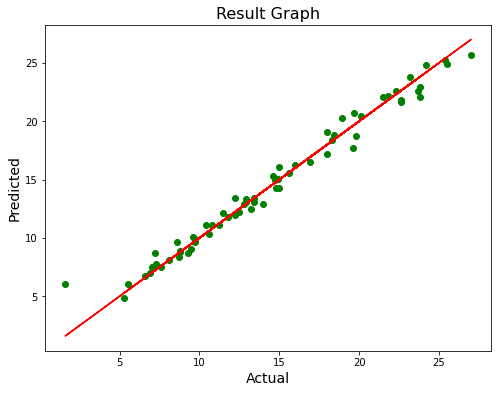

In [105]:
# Final output Graph
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color="g")
plt.plot(y_test,y_test,color="r")
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title("Result Graph",fontsize=16)
plt.show()

### Saving the Model

In [107]:
import pickle, joblib
filename = 'Advertising.pkl'
pickle.dump(GBR,open(filename,'wb'))

In [108]:
GBR=joblib.load('Advertising.pkl')
Predicted = GBR.predict(x_test)
Predicted

array([18.72324674,  8.70557233, 19.05208586, 24.82359748, 21.63955509,
       15.27609481, 14.99933553, 22.59574935, 22.5810241 ,  8.74991744,
       25.33010648,  9.65664303,  8.33541243, 20.46451806, 20.59293199,
       12.91222927, 18.69083584,  4.90220679, 22.12355126, 21.79068107,
       15.53919292,  6.08198119, 24.78087797, 16.21918825, 14.29036232,
        7.47941695,  9.07374414, 11.0764925 , 23.81663896,  7.47152602,
       13.32417667, 22.09603208,  6.98670951,  7.75800171, 12.82303986,
       11.82235568,  8.79088648, 14.31038826, 10.32759482, 12.12507128,
       11.1104207 , 12.46394005, 16.05650468, 10.08485559, 22.05901842,
        8.84560073, 15.01520258, 13.38762049,  6.06833046, 13.42210345,
        9.66814264, 13.10077507, 22.96025988, 17.15125527, 12.1794788 ,
        8.07087226, 25.70217493, 18.39326782, 11.14091484,  9.88518136,
        6.72539979, 13.1162199 , 16.52061559, 11.93043194, 17.73886454,
       20.25316975])

In [109]:
Final=np.array(y_test)
Final

array([18.4,  7.2, 18. , 25.5, 22.6, 14.6, 14.9, 23.7, 22.3,  9.3, 25.4,
        8.6,  8.7, 20.1, 19.7, 14. , 19.8,  5.3, 21.8, 22.6, 15.6,  1.6,
       24.2, 16. , 14.8,  7. ,  9.5, 10.4, 23.2,  7.6, 12.9, 21.5,  6.9,
        7.3, 12.8, 11.8,  8.8, 15. , 10.6, 11.5, 10.8, 13.2, 15. ,  9.6,
       23.8,  8.8, 14.7, 13.4,  5.5, 12.2,  9.7, 12.9, 23.8, 18. , 12.5,
        8.1, 27. , 18.3, 11.2,  9.7,  6.6, 13.4, 16.9, 12.2, 19.6, 18.9])

In [110]:
predict=np.array(GBR.predict(x_test))
predict

array([18.72324674,  8.70557233, 19.05208586, 24.82359748, 21.63955509,
       15.27609481, 14.99933553, 22.59574935, 22.5810241 ,  8.74991744,
       25.33010648,  9.65664303,  8.33541243, 20.46451806, 20.59293199,
       12.91222927, 18.69083584,  4.90220679, 22.12355126, 21.79068107,
       15.53919292,  6.08198119, 24.78087797, 16.21918825, 14.29036232,
        7.47941695,  9.07374414, 11.0764925 , 23.81663896,  7.47152602,
       13.32417667, 22.09603208,  6.98670951,  7.75800171, 12.82303986,
       11.82235568,  8.79088648, 14.31038826, 10.32759482, 12.12507128,
       11.1104207 , 12.46394005, 16.05650468, 10.08485559, 22.05901842,
        8.84560073, 15.01520258, 13.38762049,  6.06833046, 13.42210345,
        9.66814264, 13.10077507, 22.96025988, 17.15125527, 12.1794788 ,
        8.07087226, 25.70217493, 18.39326782, 11.14091484,  9.88518136,
        6.72539979, 13.1162199 , 16.52061559, 11.93043194, 17.73886454,
       20.25316975])

In [111]:
df_pred=pd.DataFrame({"original":Final,"predicted":predict},index=range(len(Final)))
df_pred

,original,predicted
0,18.4,18.723247
1,7.2,8.705572
2,18.0,19.052086
3,25.5,24.823597
4,22.6,21.639555
...,...,...
61,13.4,13.116220
62,16.9,16.520616
63,12.2,11.930432
64,19.6,17.738865


***Above table is the original Rings and predicted Sales of Advertising***

### Conclusion